In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import savefig
%matplotlib inline
from sklearn import metrics
import seaborn as sns

data = pd.read_csv('/content/sample_data/parkinsons.data')
print('Shape:',data.shape)

Shape: (195, 24)


In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

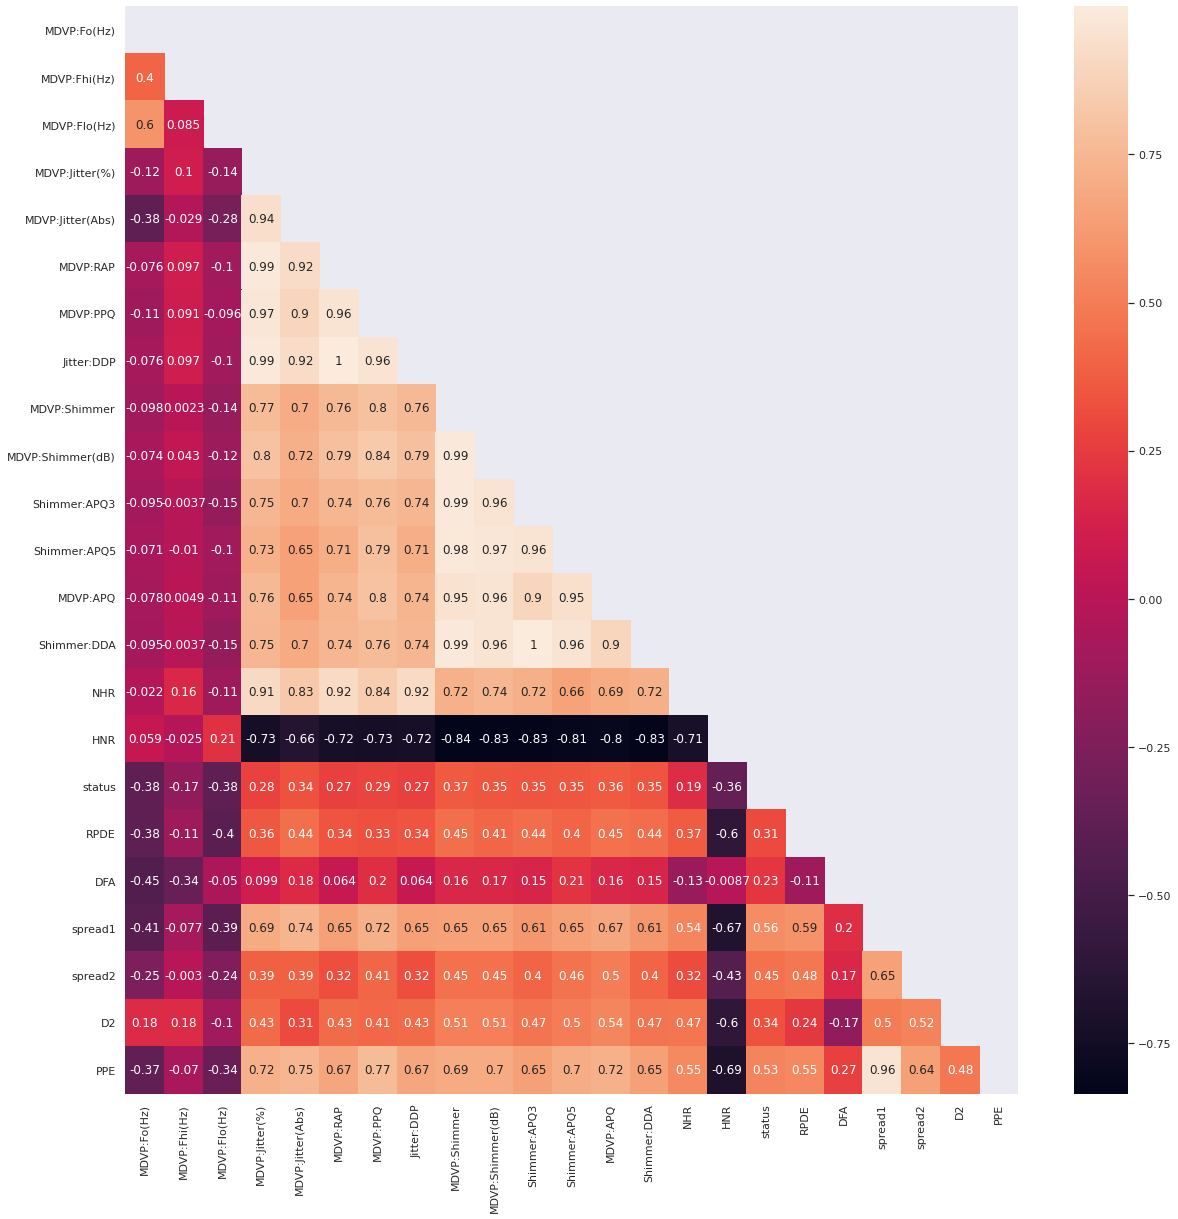

In [ ]:
corr = data.iloc[:,1:24].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(20,20)})
heatmap = sns.heatmap(corr,annot=True,mask=mask,)
heatmap

In [ ]:
figure = heatmap.get_figure()    
figure.savefig('heatmap1.png', dpi=400)

From the heatmap we can see that 
Jitter: DDP and MDVP: RAP have correlation 1
similarly,
Shimmer: DDA and Shimmer: APQ3 have correlation 1
Also we can observe that in the mid section of the heatmap attributes have a correlation of >0.7. Hence we remove ('MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR')

In [ ]:
data.drop(['name','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR','PPE'],axis=1,inplace=True)

In [ ]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


**HeatMap after removing correlated attributes...**

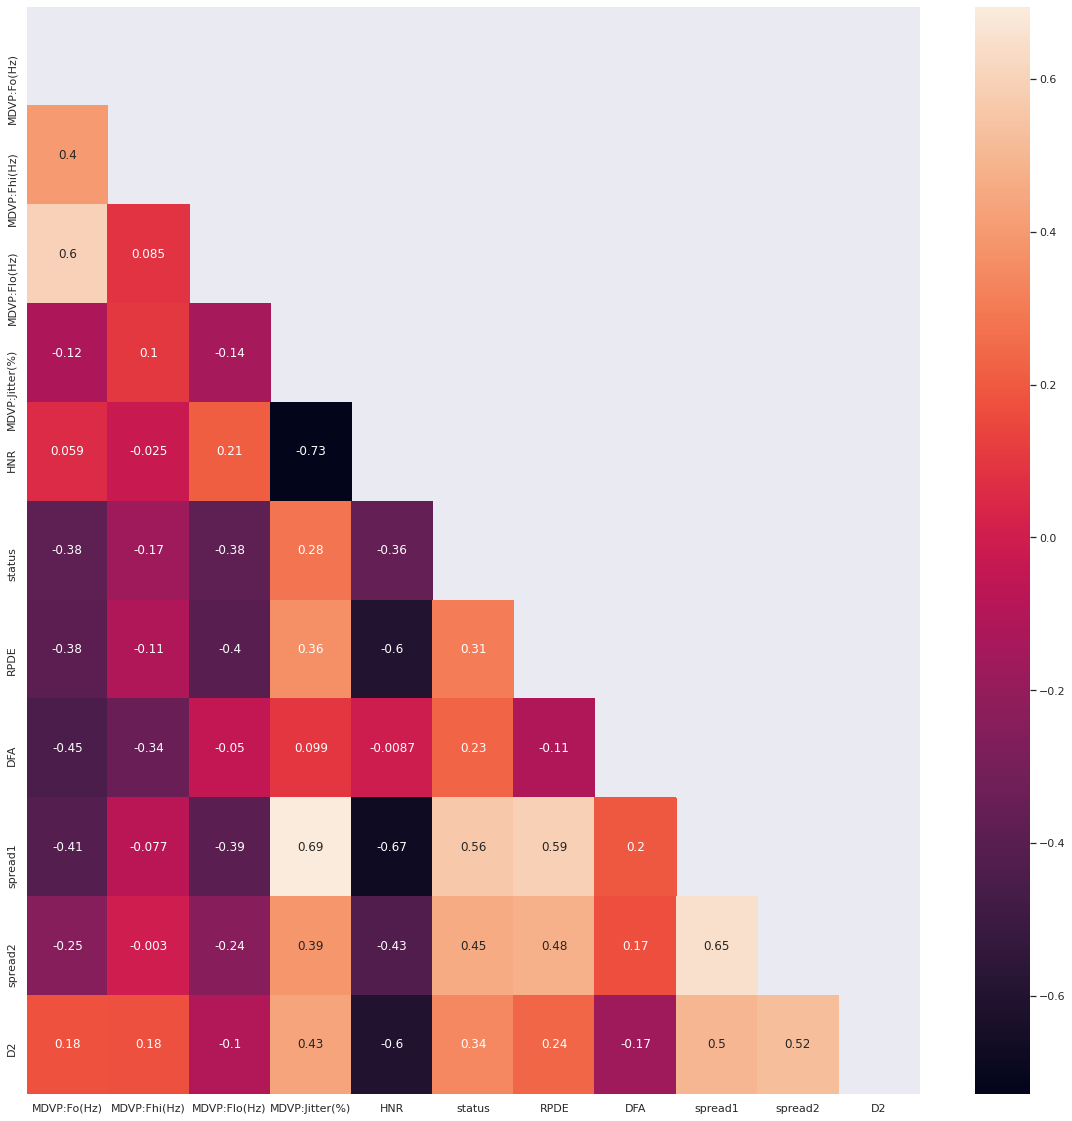

In [ ]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(20,20)})
new_haetmap = sns.heatmap(corr,annot=True,mask=mask)

In [ ]:
figure = new_haetmap.get_figure()    
figure.savefig('heatmap2.png', dpi=400)

In [ ]:
data.shape

(195, 11)

In [ ]:
status = data['status'].to_list()
status_ones = status.count(1)
status_zeros = status.count(0)
print('Healthy: ',status_zeros)
print('PD: ',status_ones)

Healthy:  48
PD:  147


Since there are 48-Healthy and 147-PD, train-->(34+103=137) and test-->(14+44=58)

In [ ]:
data_ones = data[data['status']==1]
data_zeros = data[data['status']==0]


print('Status==1 Shape: ',data_ones.shape)
print('Status==0 Shape: ',data_zeros.shape)

Ydata_ones = data_ones['status'] 
Xdata_ones = data_ones[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','HNR','RPDE','DFA','spread1','spread2','D2']]
Ydata_zeros = data_zeros['status'] 
Xdata_zeros = data_zeros[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','HNR','RPDE','DFA','spread1','spread2','D2']]


Status==1 Shape:  (147, 11)
Status==0 Shape:  (48, 11)


In [ ]:
import sklearn.model_selection as model_selection

Xones_train,Xones_test,Yones_train,Yones_test = model_selection.train_test_split(Xdata_ones,Ydata_ones,train_size=0.70,test_size=0.30, random_state=101)

Xzeros_train,Xzeros_test,Yzeros_train,Yzeros_test = model_selection.train_test_split(Xdata_zeros,Ydata_zeros,train_size=0.70,test_size=0.30, random_state=101)

X_data_train = pd.concat([Xones_train,Xzeros_train])
Y_data_train = pd.concat([Yones_train,Yzeros_train])
print('X_data_train SHAPE: {}  Y_data_train SHAPE: {}'.format(X_data_train.shape,Y_data_train.shape))
X_data_test = pd.concat([Xones_test,Xzeros_test])
Y_data_test = pd.concat([Yones_test,Yzeros_test])
print('X_data_test SHAPE: {}  Y_data_test SHAPE: {}'.format(X_data_test.shape,Y_data_test.shape))

X_data_train SHAPE: (135, 10)  Y_data_train SHAPE: (135,)
X_data_test SHAPE: (60, 10)  Y_data_test SHAPE: (60,)


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randmclf = RandomForestClassifier(n_estimators=101)

randmclf.fit(X_data_train,Y_data_train)

y_pred = randmclf.predict(X_data_test)

In [ ]:
from sklearn import metrics

print("Accuracy: {}".format(metrics.accuracy_score(Y_data_test,y_pred)))


Accuracy: 0.8833333333333333


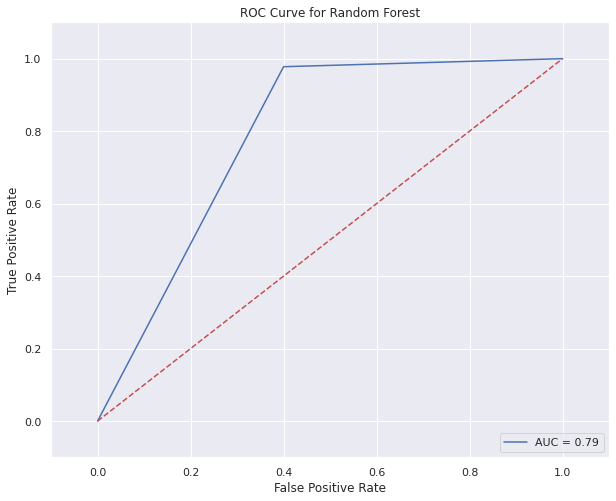

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y_data_test, y_pred)

auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,8))
# clear current figure
plt.clf()

plt.title('ROC Curve for Random Forest')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

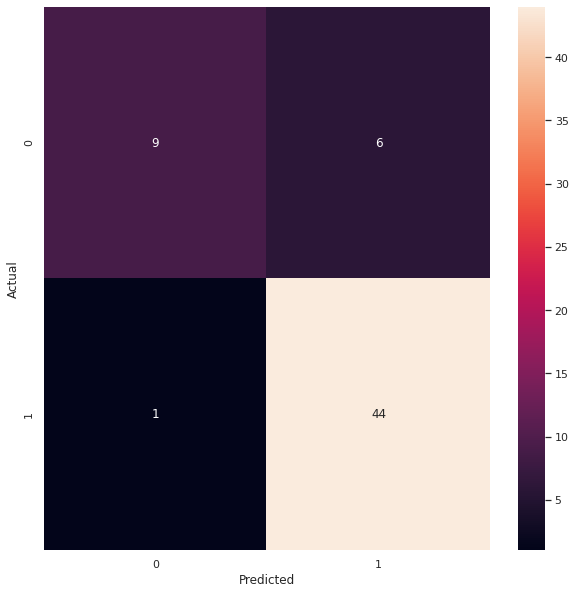

In [ ]:
import seaborn as sns
confusion_matrix = pd.crosstab(Y_data_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True)
plt.show()

## XGBoost Classifier Model

In [ ]:
from xgboost import XGBClassifier

xgbmodel = XGBClassifier()
xgbmodel.fit(X_data_train,Y_data_train)

y_pred = xgbmodel.predict(X_data_test)
predictions = [round(value) for value in y_pred]

In [ ]:
print("Accuracy: {}".format(metrics.accuracy_score(Y_data_test,y_pred)))

Accuracy: 0.9333333333333333


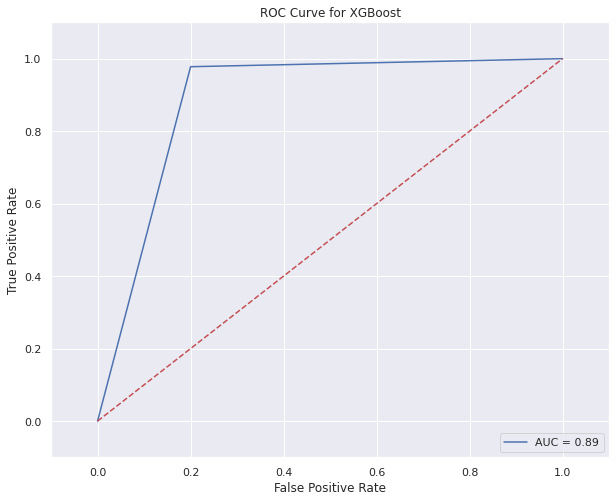

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y_data_test, y_pred)

auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,8))
# clear current figure
plt.clf()

plt.title('ROC Curve for XGBoost')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

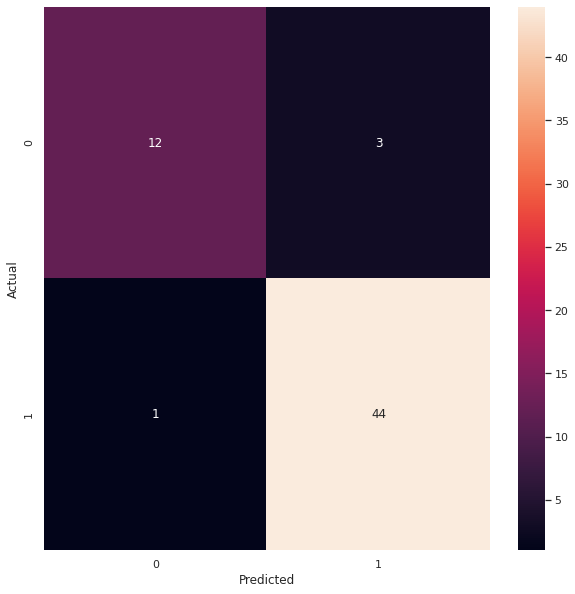

In [ ]:
confusion_matrix = pd.crosstab(Y_data_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True)
plt.show()

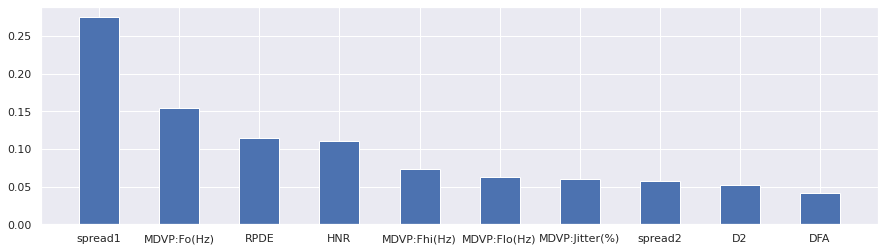

In [ ]:
df = data.drop(['status'],axis=1)
importance_data = sorted(list(zip(df.columns,xgbmodel.feature_importances_)),key=lambda tpl:tpl[1],reverse=True)

xs = range(len(importance_data))
labels = [x for (x,_) in importance_data]
ys = [y for (_,y) in importance_data]

plt.rcParams["figure.figsize"] = (15,4)
plt.clf()
plt.bar(xs,ys,width=0.5)
plt.xticks(xs,labels)
plt.show()

## SVM Classifier Model

In [ ]:
from sklearn import svm

svmModel = svm.SVC(kernel='linear')

svmModel.fit(X_data_train,Y_data_train)
y_pred = svmModel.predict(X_data_test)

In [ ]:
print("Accuracy: {}".format(metrics.accuracy_score(Y_data_test,y_pred)))

Accuracy: 0.85


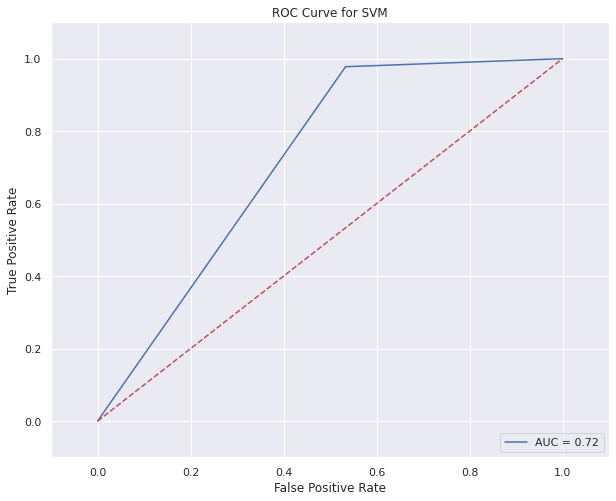

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y_data_test, y_pred)

auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,8))
# clear current figure
plt.clf()

plt.title('ROC Curve for SVM')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

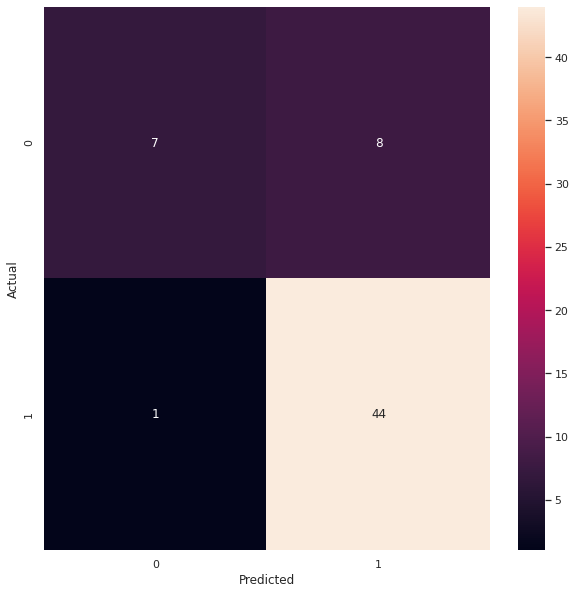

In [ ]:
confusion_matrix = pd.crosstab(Y_data_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dftreeclf = DecisionTreeClassifier()
dftreeclf.fit(X_data_train,Y_data_train)

y_pred = dftreeclf.predict(X_data_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_data_test, y_pred))

Accuracy: 0.8166666666666667


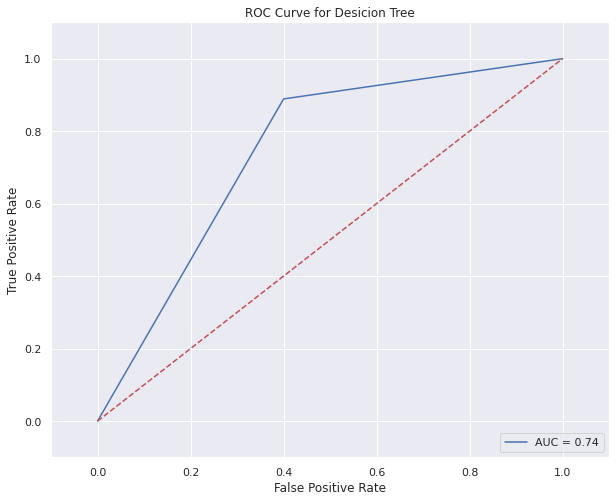

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y_data_test, y_pred)

auc_score = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,8))
# clear current figure
plt.clf()

plt.title('ROC Curve for Desicion Tree')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

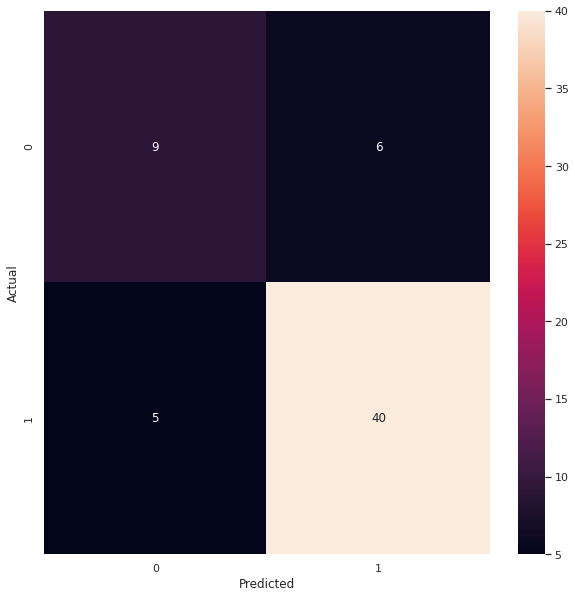

In [ ]:
confusion_matrix = pd.crosstab(Y_data_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True)
plt.show()

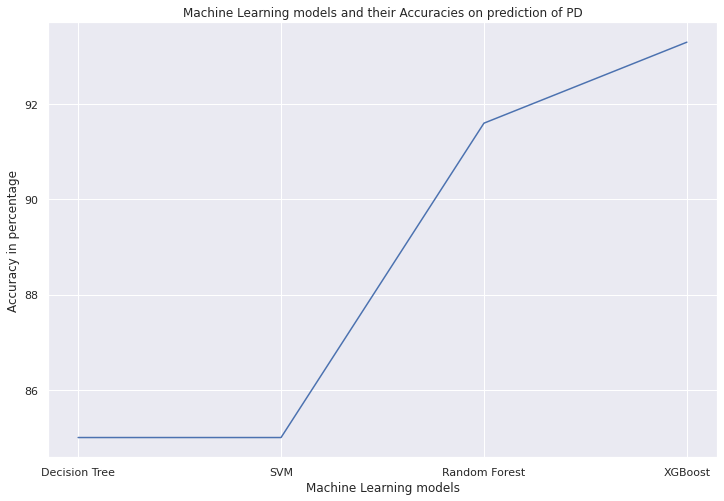

In [ ]:

import matplotlib.pyplot as plt 
Accuracy = [85,85,91.6,93.3]
ML_models = ["Decision Tree","SVM","Random Forest","XGBoost"]
plt.figure(figsize=(12,8))  
plt.plot(ML_models, Accuracy)
plt.title('Machine Learning models and their Accuracies on prediction of PD')
plt.xlabel('Machine Learning models')
plt.ylabel('Accuracy in percentage')
plt.savefig('graph.jpg')